<a href="https://www.kaggle.com/code/parisammm/improving-kmeans-clustering?scriptVersionId=159588695" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clusters-data/cluster_2.csv
/kaggle/input/clusters-data/cluster_3.csv
/kaggle/input/clusters-data/cluster_0.csv
/kaggle/input/clusters-data/cluster_1.csv
/kaggle/input/chatgpt-reddit/chatgpt-reddit-comments.csv


In [2]:
data = pd.read_csv('/kaggle/input/chatgpt-reddit/chatgpt-reddit-comments.csv')
data.head()

,Unnamed: 0,comment_id,comment_parent_id,comment_body,subreddit
0,0,iztdxuh,t3_zj2aeu,"I've been shocked for days now, I don't need c...",r/ChatGPT
1,1,iztn0q0,t3_zj2aeu,\n\nI am so angry right now. I just wasted my...,r/ChatGPT
2,2,izudrph,t3_zj2aeu,chatgpt karma whoring is here folks! just when...,r/ChatGPT
3,3,iztfhtb,t3_zj2aeu,"Worked on me, ngl.",r/ChatGPT
4,4,izu2as9,t3_zj2aeu,"Certified 10/10, must-see moment. It really di...",r/ChatGPT


***> Named Entity Recognition using Spacy***

In [3]:
# command to run before code
! pip install spacy
! python -m spacy download en_core_web_sm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
#using spacy
 
# imports and load spacy english language package
import spacy
from spacy import displacy
from spacy import tokenizer
nlp = spacy.load('en_core_web_sm')
 
#Load the text and process it
# I copied the text from python wiki
text =(data['comment_body'][6])
# text2 = # copy the paragraphs from  https://www.python.org/doc/essays/
doc = nlp(text)
#doc2 = nlp(text2)
sentences = list(doc.sents)
#print(sentences)
# tokenization
#for token in doc:
    #print(token.text)
# print entities
ents = [e.label_ for e in doc.ents]
# now we use displaycy function on doc2
#displacy.render(doc, style='ent', jupyter=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [5]:
cluster0 = pd.read_csv('/kaggle/input/clusters-data/cluster_0.csv')
cluster0_sample = cluster0.sample(n = 500)

comments = list(cluster0_sample['comment'])
entities0 = []
for comment in comments:
    doc = nlp(comment)
    entities0.append([e.label_ for e in doc.ents])


In [6]:
from collections import Counter
entities_set = set()
entities_list0 = [item for row in entities0 for item in row]
entities_set.update(entities_list0)
dict_c0 = dict(Counter(entities_list0))

In [7]:
cluster1 = pd.read_csv('/kaggle/input/clusters-data/cluster_1.csv')
cluster1_sample = cluster1.sample(n = 500)

comments = list(cluster1_sample['comment'])
entities1 = []
for comment in comments:
    doc = nlp(comment)
    entities1.append([e.label_ for e in doc.ents])


In [8]:
entities_list1 = [item for row in entities1 for item in row]
#print(entities_list)
entities_set.update(entities_list1)
dict_c1 = dict(Counter(entities_list1))

In [9]:
cluster2 = pd.read_csv('/kaggle/input/clusters-data/cluster_2.csv')
cluster2_sample = cluster2.sample(n = 500)

comments = list(cluster2_sample['comment'])
entities2 = []
for comment in comments:
    doc = nlp(comment)
    entities2.append([e.label_ for e in doc.ents])

In [10]:
entities_list2 = [item for row in entities2 for item in row]
entities_set.update(entities_list2)
dict_c2 = dict(Counter(entities_list2))

In [11]:
cluster3 = pd.read_csv('/kaggle/input/clusters-data/cluster_3.csv')
cluster3_sample = cluster3.sample(n = 500)

comments = list(cluster3_sample['comment'])
entities3 = []
for comment in comments:
    doc = nlp(comment)
    entities3.append([e.label_ for e in doc.ents])

In [12]:
entities_list3 = [item for row in entities3 for item in row]
entities_set.update(entities_list3)
dict_c3 = dict(Counter(entities_list3))

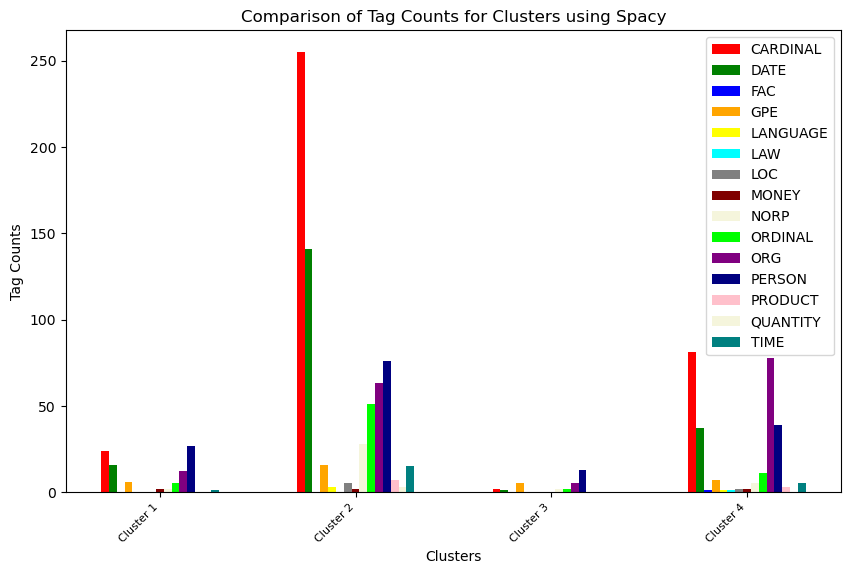

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the clusters
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Tag counts for each cluster
tag_counts = {
    'Cluster 1': dict_c0,
    'Cluster 2': dict_c1,
    'Cluster 3': dict_c2,
    'Cluster 4': dict_c3
}

# Get all unique tags
tags = sorted(set(tag for cluster_tags in tag_counts.values() for tag in cluster_tags.keys()))

# Get the count for each tag in each cluster
counts = [[tag_counts[cluster].get(tag, 0) for tag in tags] for cluster in clusters]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar and the spacing between clusters
bar_width = 0.04
colors = ['red', 'green', 'blue', 'orange', 'yellow', 'cyan', 'gray','maroon',
          'Beige', 'lime', 'purple', 'Navy','Pink', 'Beige', 'Teal', 'Magenta'] 

# Set the positions of the bars on the x-axis
x = np.arange(len(clusters))

# Plot the bars for each tag
for i, tag in enumerate(tags):
    plt.bar(x + i * (bar_width), [count[i] for count in counts], width=bar_width, label=tag, color=colors[i % len(colors)])

# Set the x-axis labels and title
plt.xlabel('Clusters')
plt.ylabel('Tag Counts')
plt.title('Comparison of Tag Counts for Clusters using Spacy')

# Set the x-axis tick positions and labels with increased boundaries
plt.xticks(x + ((len(tags) - 1) * bar_width) / 2, clusters, fontsize=8, rotation=45, ha='right')

# Add a legend
plt.legend()

# Show the plot
plt.show()

***Named Entity Recognition using NLTK***

In [14]:
! pip install nltk

In [15]:
import nltk
from nltk import word_tokenize, pos_tag

nltk.download('words')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')
text='cannot help thinking chatgpt writing entire thread real time fookin real anymore unreal'
for sent in nltk.sent_tokenize(text):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            print(chunk.label())


[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [16]:
cluster1 = pd.read_csv('/kaggle/input/clusters-data/cluster_1.csv')
cluster1_sample = cluster1.sample(n = 500)

comments = list(cluster1_sample['comment'])
entities_dict1 = {}
for comment in comments:
    #print(comment)
    for sent in nltk.sent_tokenize(comment):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                if chunk.label() in entities_dict1:
                    entities_dict1[chunk.label()] = entities_dict1[chunk.label()] +1
                else:
                    entities_dict1[chunk.label()] = 1

print(entities_dict1)

{}


In [17]:
cluster2 = pd.read_csv('/kaggle/input/clusters-data/cluster_2.csv')
cluster2_sample = cluster2.sample(n = 500)

comments = list(cluster2_sample['comment'])
entities_dict2 = {}
for comment in comments:
    #print(comment)
    for sent in nltk.sent_tokenize(comment):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            #print(chunk)
            if hasattr(chunk, 'label'):
                if chunk.label() in entities_dict2:
                    entities_dict2[chunk.label()] = entities_dict2[chunk.label()] +1
                else:
                    entities_dict2[chunk.label()] = 1

print(entities_dict2)

{}


In [18]:
cluster3 = pd.read_csv('/kaggle/input/clusters-data/cluster_3.csv')
cluster3_sample = cluster3.sample(n = 500)

comments = list(cluster3_sample['comment'])
entities_dict3 = {}
for comment in comments:
    #print(comment)
    for sent in nltk.sent_tokenize(comment):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            #print(chunk)
            if hasattr(chunk, 'label'):
                if chunk.label() in entities_dict3:
                    entities_dict3[chunk.label()] = entities_dict3[chunk.label()] +1
                else:
                    entities_dict3[chunk.label()] = 1

print(entities_dict3)

{}


In [19]:
cluster0 = pd.read_csv('/kaggle/input/clusters-data/cluster_0.csv')
cluster0_sample = cluster0.sample(n = 500)

comments = list(cluster0_sample['comment'])
entities_dict0 = {}
for comment in comments:
    #print(comment)
    for sent in nltk.sent_tokenize(comment):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            #print(chunk)
            if hasattr(chunk, 'label'):
                if chunk.label() in entities_dict0:
                    entities_dict0[chunk.label()] = entities_dict0[chunk.label()] +1
                else:
                    entities_dict0[chunk.label()] = 1

print(entities_dict0)

{}


***Named Entity Recognition using flair***

In [20]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 48.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993241 sha256=9f62a813c18598f9a0700e182c9c451810df2db6b4b72a3682e01bf4f3bf66dc
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
  Created wheel for pptree: filename=pptree-3.1-py3-none-any.whl size=4629 sha256=cfe1d9661b24630c30e347aac089a5afc90d4d752ee303bea3fe7863d3e5f625
  Stored in directory: /root/.cache/pip/wheels/9f/b6/0e/6f26eb9e6eb53ff2107a7888d72b5a6a597593956113037828
  Created wheel for sqlitedict: filename=sqlitedict-2.1.0-py3-none-any.whl size=16868 sha256=911051

In [21]:
# using flair

from flair.data import Sentence
from flair.models import SequenceTagger
from segtok.segmenter import split_single
tagger = SequenceTagger.load('ner-ontonotes')


2024-01-19 09:44:21,844 SequenceTagger predicts: Dictionary with 75 tags: O, S-PERSON, B-PERSON, E-PERSON, I-PERSON, S-GPE, B-GPE, E-GPE, I-GPE, S-ORG, B-ORG, E-ORG, I-ORG, S-DATE, B-DATE, E-DATE, I-DATE, S-CARDINAL, B-CARDINAL, E-CARDINAL, I-CARDINAL, S-NORP, B-NORP, E-NORP, I-NORP, S-MONEY, B-MONEY, E-MONEY, I-MONEY, S-PERCENT, B-PERCENT, E-PERCENT, I-PERCENT, S-ORDINAL, B-ORDINAL, E-ORDINAL, I-ORDINAL, S-LOC, B-LOC, E-LOC, I-LOC, S-TIME, B-TIME, E-TIME, I-TIME, S-WORK_OF_ART, B-WORK_OF_ART, E-WORK_OF_ART, I-WORK_OF_ART, S-FAC


In [22]:
cluster0 = pd.read_csv('/kaggle/input/clusters-data/cluster_0.csv')
cluster0_sample = cluster0.sample(n = 500)

comments = list(cluster0_sample['comment'])
entities_dict0 = {}
for comment in comments:
    sentence = [Sentence(sent, use_tokenizer=True) for sent in split_single(comment)]
    tagger.predict(sentence)
    for sent in sentence:
        for entity in sent.get_spans('ner'):
            if entity.tag in entities_dict0:
                entities_dict0[entity.tag] = entities_dict0[entity.tag] +1
            else:
                entities_dict0[entity.tag] = 1


cluster1 = pd.read_csv('/kaggle/input/clusters-data/cluster_1.csv')
cluster1_sample = cluster1.sample(n = 500)

comments = list(cluster1_sample['comment'])
entities_dict1 = {}
i=0
for comment in comments:
    print(i)
    i = i+1
    #print(comment)
    sentence = [Sentence(sent, use_tokenizer=True) for sent in split_single(comment)]
    tagger.predict(sentence)
    for sent in sentence:
        for entity in sent.get_spans('ner'):
            print(entity.tag)
            if entity.tag in entities_dict1:
                entities_dict1[entity.tag] = entities_dict1[entity.tag] +1
            else:
                entities_dict1[entity.tag] = 1

0
1
2
3
CARDINAL
4
5
6
7
8
9
10
DATE
11
12
DATE
CARDINAL
13
CARDINAL
14
15
CARDINAL
16
17
DATE
18
19
CARDINAL
CARDINAL
ORG
CARDINAL
20
21
GPE
GPE
GPE
22
CARDINAL
23
24
25
DATE
DATE
CARDINAL
DATE
26
ORDINAL
27
28
29
30
31
32
33
34
35
CARDINAL
PERSON
ORDINAL
36
37
GPE
38
CARDINAL
39
40
41
42
43
CARDINAL
CARDINAL
44
DATE
45
46
47
DATE
48
49
50
51
52
CARDINAL
CARDINAL
53
54
55
56
57
GPE
GPE
GPE
58
NORP
59
ORDINAL
60
61
62
63
64
65
66
67
CARDINAL
68
CARDINAL
69
DATE
70
71
TIME
72
GPE
73
74
75
76
77
78
CARDINAL
DATE
DATE
ORDINAL
ORDINAL
DATE
ORDINAL
79
80
81
82
83
84
85
86
CARDINAL
87
ORG
88
89
90
91
DATE
DATE
DATE
DATE
DATE
DATE
92
CARDINAL
93
CARDINAL
94
CARDINAL
95
96
CARDINAL
NORP
CARDINAL
97
98
99
GPE
100
ORDINAL
DATE
101
102
103
ORDINAL
104
105
DATE
DATE
106
CARDINAL
CARDINAL
CARDINAL
107
QUANTITY
QUANTITY
CARDINAL
DATE
CARDINAL
108
109
PERSON
PERSON
NORP
NORP
110
CARDINAL
CARDINAL
CARDINAL
111
112
113
114
115
116
117
118
119
ORDINAL
120
121
122
123
DATE
QUANTITY
CARDINAL
124
CARDINAL


In [23]:
cluster2 = pd.read_csv('/kaggle/input/clusters-data/cluster_2.csv')
cluster2_sample = cluster2.sample(n = 500)

comments = list(cluster2_sample['comment'])
entities_dict2 = {}
i=0
for comment in comments:
    i = i+1
    sentence = [Sentence(sent, use_tokenizer=True) for sent in split_single(comment)]
    tagger.predict(sentence)
    for sent in sentence:
        for entity in sent.get_spans('ner'):
            if entity.tag in entities_dict2:
                entities_dict2[entity.tag] = entities_dict2[entity.tag] +1
            else:
                entities_dict2[entity.tag] = 1

In [24]:
cluster3 = pd.read_csv('/kaggle/input/clusters-data/cluster_3.csv')
cluster3_sample = cluster3.sample(n = 500)

comments = list(cluster3_sample['comment'])
entities_dict3 = {}
i=0
for comment in comments:
    i = i+1
    sentence = [Sentence(sent, use_tokenizer=True) for sent in split_single(comment)]
    tagger.predict(sentence)
    for sent in sentence:
        for entity in sent.get_spans('ner'):
            print(entity.tag)
            if entity.tag in entities_dict3:
                entities_dict3[entity.tag] = entities_dict3[entity.tag] +1
            else:
                entities_dict3[entity.tag] = 1

DATE
DATE
MONEY
DATE
PERSON
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
DATE
ORDINAL
CARDINAL
CARDINAL
DATE
DATE
CARDINAL
DATE
CARDINAL
CARDINAL
DATE
DATE
CARDINAL
CARDINAL
PERSON
CARDINAL
PERCENT
CARDINAL
ORDINAL
QUANTITY
TIME
CARDINAL
NORP
CARDINAL
CARDINAL
CARDINAL
PERSON
CARDINAL
CARDINAL
CARDINAL
QUANTITY
QUANTITY
CARDINAL
CARDINAL
CARDINAL
CARDINAL
ORDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
ORDINAL
CARDINAL
TIME
DATE
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
TIME
CARDINAL
ORDINAL
CARDINAL
ORG
CARDINAL
CARDINAL
DATE
DATE
CARDINAL
DATE
QUANTITY
DATE
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
DATE
TIME
DATE
CARDINAL
QUANTITY
CARDINAL
ORDINAL
DATE


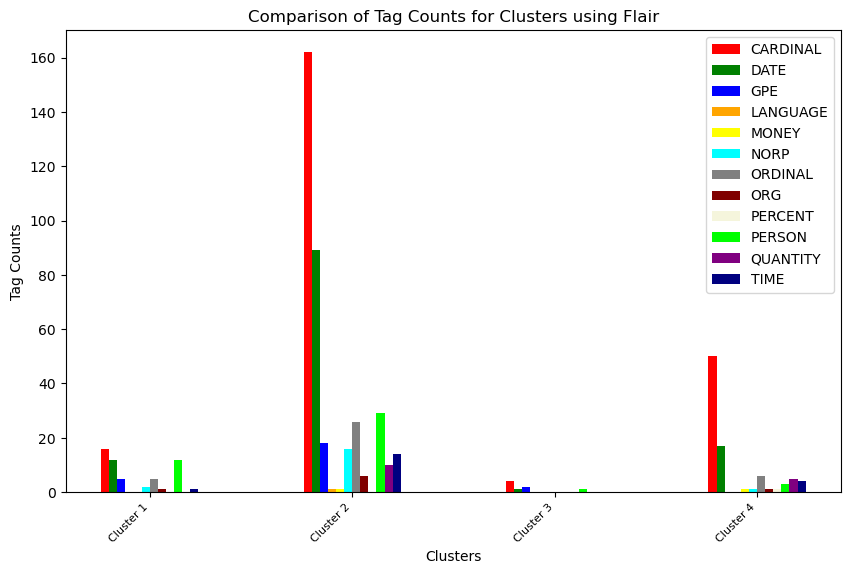

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the clusters
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Tag counts for each cluster
tag_counts = {
    'Cluster 1': entities_dict0,
    'Cluster 2': entities_dict1,
    'Cluster 3': entities_dict2,
    'Cluster 4': entities_dict3
}

# Get all unique tags
tags = sorted(set(tag for cluster_tags in tag_counts.values() for tag in cluster_tags.keys()))

# Get the count for each tag in each cluster
counts = [[tag_counts[cluster].get(tag, 0) for tag in tags] for cluster in clusters]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar and the spacing between clusters
bar_width = 0.04
colors = ['red', 'green', 'blue', 'orange', 'yellow', 'cyan', 'gray','maroon',
          'Beige', 'lime', 'purple', 'Navy','Pink', 'Beige', 'Teal', 'Magenta'] 

# Set the positions of the bars on the x-axis
x = np.arange(len(clusters))

# Plot the bars for each tag
for i, tag in enumerate(tags):
    plt.bar(x + i * (bar_width), [count[i] for count in counts], width=bar_width, label=tag, color=colors[i % len(colors)])

# Set the x-axis labels and title
plt.xlabel('Clusters')
plt.ylabel('Tag Counts')
plt.title('Comparison of Tag Counts for Clusters using Flair')

# Set the x-axis tick positions and labels with increased boundaries
plt.xticks(x + ((len(tags) - 1) * bar_width) / 2, clusters, fontsize=8, rotation=45, ha='right')

# Add a legend
plt.legend()

# Show the plot
plt.show()